In [165]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold

In [166]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing the Data

In [167]:
df = pd.read_csv(r'C:\Users\sarav\Desktop\Churn\IBM_Telecom_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Overview and Cleaning

In [168]:
df.shape #rows vs columns

(7043, 21)

In [169]:
df.info() # Columns and its data type
#numerical columns - int - seniorcitizen, tenure and - float - monthlycharges, totalcharges
#total charges need to be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [170]:
df.isnull().sum() #checking for missing values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [171]:
df.duplicated().sum()#checking for duplicates

0

In [172]:
df.nunique() # To identify the unique value types in the columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [173]:
for col in df.dtypes[df.dtypes == object].index:
    print(col, df[col].unique()) 
# To identify the unique value types in the columns

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [174]:
df['TotalCharges'] #current dtype is numerical

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [175]:
#TotalCharges column should be numerical
df.TotalCharges = df.TotalCharges.astype(float)  
#ValueError: could not convert string to float: 

ValueError: could not convert string to float: 

In [176]:
#Is there any NaN values as error says string?
df["TotalCharges"].isna().sum() 

0

In [177]:
#Checking for space are blank values
df["TotalCharges"].isin([' ']).any()

True

In [178]:
#Checking for rows having space as TotalCharge
df["TotalCharges"].isin([' ']).sum() 

11

In [179]:
#what are the MonthlyCharge and Tenure when TotalCharge is a space/blank value
for i in range(len(df)):
    if df["TotalCharges"][i] == " ":
        print("Tenure is %s and Monthly charges are %s" % (df.tenure[i], df.MonthlyCharges[i]))

Tenure is 0 and Monthly charges are 52.55
Tenure is 0 and Monthly charges are 20.25
Tenure is 0 and Monthly charges are 80.85
Tenure is 0 and Monthly charges are 25.75
Tenure is 0 and Monthly charges are 56.05
Tenure is 0 and Monthly charges are 19.85
Tenure is 0 and Monthly charges are 25.35
Tenure is 0 and Monthly charges are 20.0
Tenure is 0 and Monthly charges are 19.7
Tenure is 0 and Monthly charges are 73.35
Tenure is 0 and Monthly charges are 61.9


In [180]:
#Total charges are blank when tenure is 0, may be short term customers or travellers. 
#since Tenure is zero lets consider their TotalCharges were also zero
df["TotalCharges"].replace([" "], ["0"], inplace= True)

In [181]:
#TotalCharges to numerical
df["TotalCharges"] = df.TotalCharges.astype(float)

In [182]:
df["TotalCharges"].isin(['0']).sum() 

11

## Exploratory Data Analysis

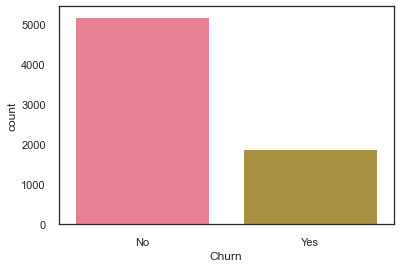

In [183]:
sns.set(style="white", palette='husl', color_codes=True)
sns.despine(left=True)
sns.countplot(df["Churn"]);

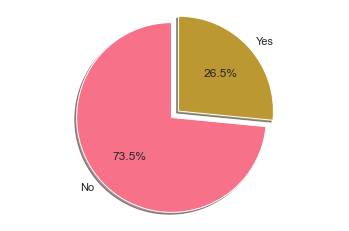

In [184]:
plt.pie(df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=df["Churn"].unique())
plt.axis("equal") ;

In [185]:
temp_tenure = np.array(df["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 0
max: 72


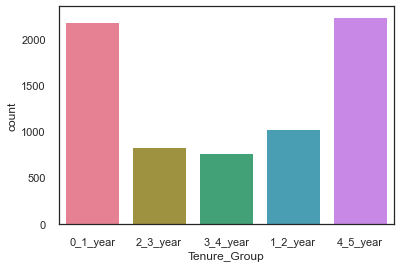

In [186]:
def tenure_to_group(df):
    if df["tenure"] <=12:
        return "0_1_year"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "1_2_year"
    elif (df["tenure"] > 24) & (df["tenure"] <= 36) :
        return "2_3_year"
    elif (df["tenure"] > 36) & (df["tenure"] <= 48) :
        return "3_4_year"
    elif df["tenure"] > 48 & (df["tenure"] <= 60):
        return "4_5_year"
    elif df["tenure"] > 60 & (df["tenure"] <= 72):
        return "5_6_year"
df["Tenure_Group"] = df.apply(lambda df:tenure_to_group(df),axis = 1)
sns.countplot(df["Tenure_Group"],palette='husl');

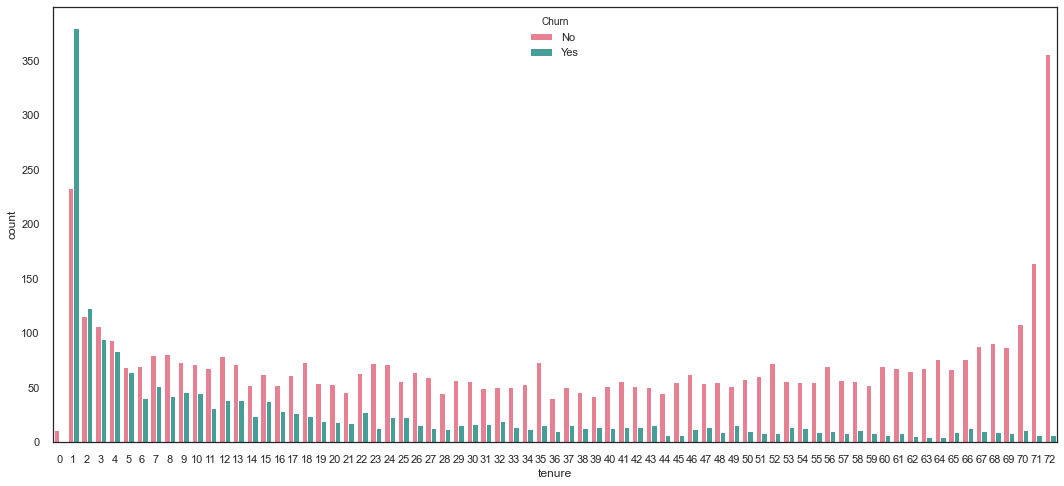

In [187]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(df["tenure"],hue = df["Churn"],palette='husl');

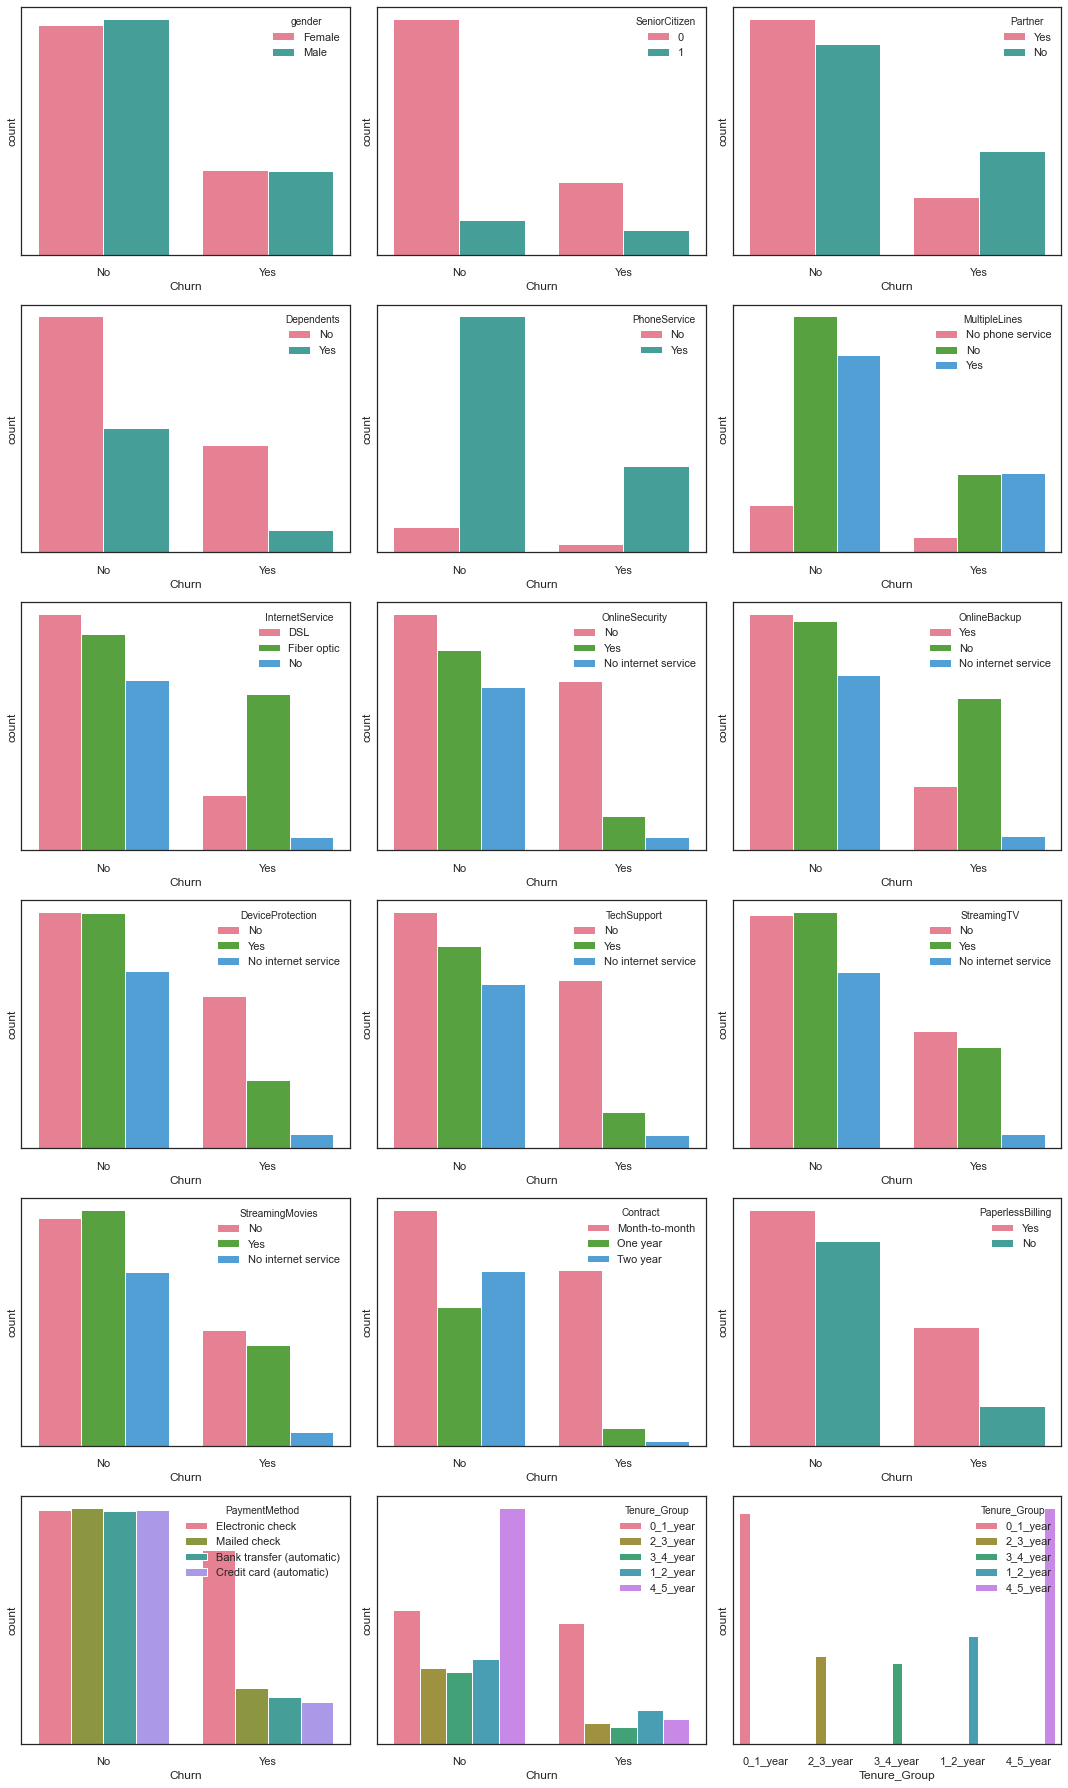

In [188]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))

sns.countplot(df["Churn"],hue = df["gender"],palette='husl',ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["SeniorCitizen"],palette='husl',ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Partner"],palette='husl',ax = axes[0,2])
sns.countplot(df["Churn"],hue = df["Dependents"],palette='husl',ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["PhoneService"],palette='husl',ax = axes[1,1])
sns.countplot(df["Churn"],hue = df["MultipleLines"],palette='husl',ax = axes[1,2])
sns.countplot(df["Churn"],hue = df["InternetService"],palette='husl',ax = axes[2,0])
sns.countplot(df["Churn"],hue = df["OnlineSecurity"],palette='husl',ax = axes[2,1])
sns.countplot(df["Churn"],hue = df["OnlineBackup"],palette='husl',ax = axes[2,2])
sns.countplot(df["Churn"],hue = df["DeviceProtection"],palette='husl',ax = axes[3,0])
sns.countplot(df["Churn"],hue = df["TechSupport"],palette='husl',ax = axes[3,1])
sns.countplot(df["Churn"],hue = df["StreamingTV"],palette='husl',ax = axes[3,2])
sns.countplot(df["Churn"],hue = df["StreamingMovies"],palette='husl',ax = axes[4,0])
sns.countplot(df["Churn"],hue = df["Contract"],palette='husl',ax = axes[4,1])
sns.countplot(df["Churn"],hue = df["PaperlessBilling"],palette='husl',ax = axes[4,2])
sns.countplot(df["Churn"],hue = df["PaymentMethod"],palette='husl',ax = axes[5,0])
sns.countplot(df["Churn"],hue = df["Tenure_Group"],palette='husl',ax = axes[5,1])
sns.countplot(df["Tenure_Group"],hue = df["Tenure_Group"],palette='husl',ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()


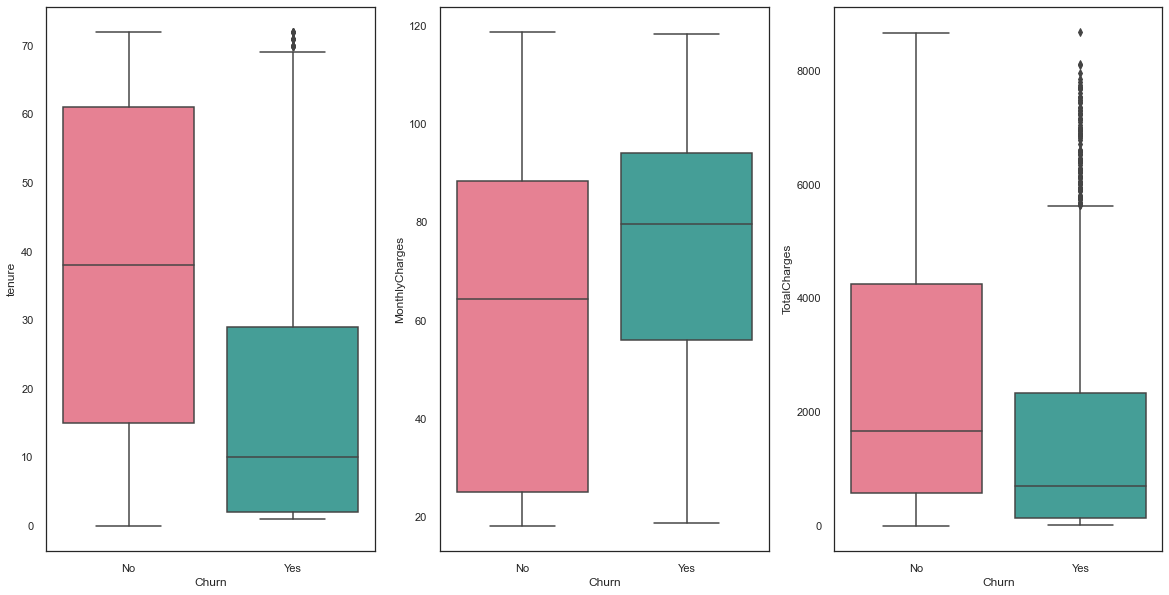

In [189]:
f, axes = plt.subplots( ncols=3, figsize=(20, 10))
sns.boxplot(x="Churn", y="tenure", data=df,palette='husl',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,palette='husl',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=df,palette='husl',ax = axes[2]);

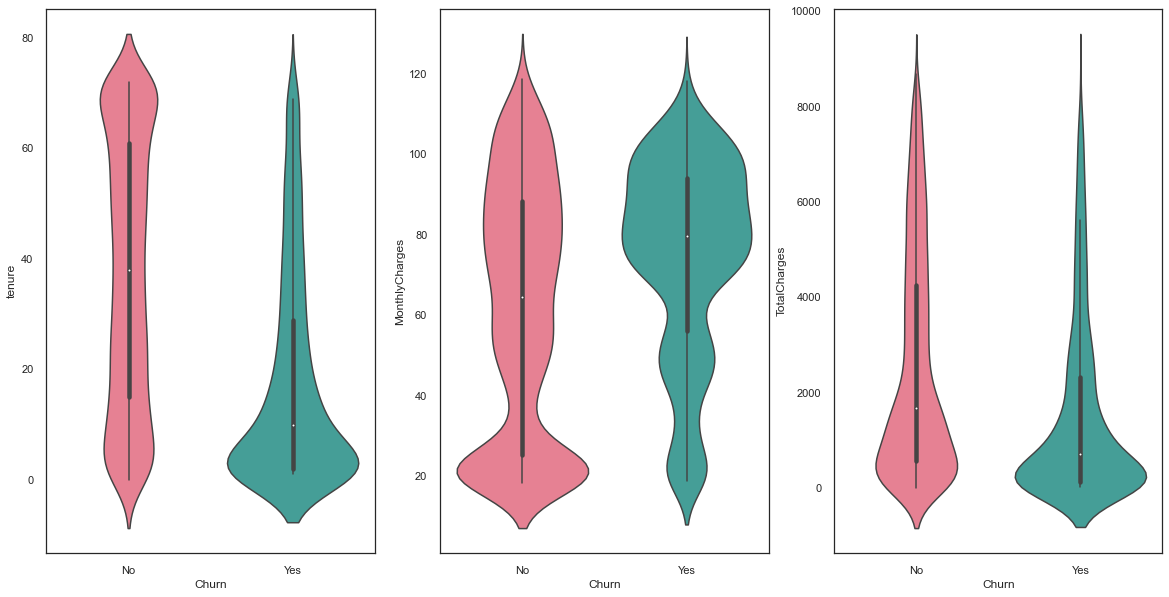

In [190]:
f, axes = plt.subplots( ncols=3, figsize=(20, 10))
sns.violinplot(x="Churn", y="tenure", data=df,palette='husl',ax = axes[0]);
sns.violinplot(x="Churn", y="MonthlyCharges", data=df,palette='husl',ax = axes[1])
sns.violinplot(x="Churn", y="TotalCharges", data=df,palette='husl',ax = axes[2]);

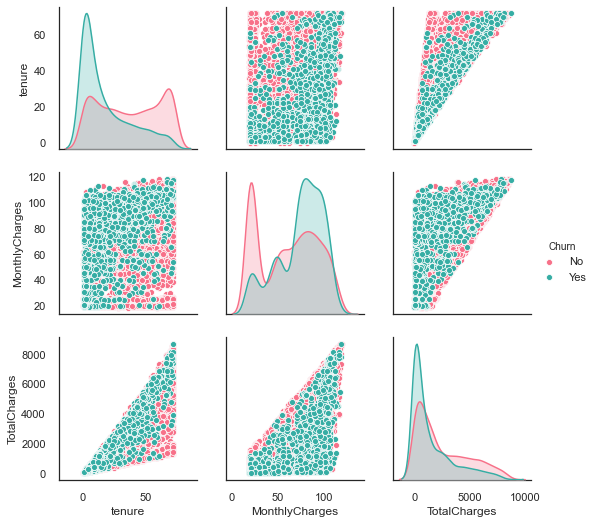

In [191]:
temp_cols = df.drop("SeniorCitizen",axis = 1)
sns.pairplot(temp_cols,hue='Churn',palette='husl');

In [192]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [193]:
df.describe().T #Transposed for easier visualization

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [194]:
df.groupby('Churn').describe().T

Churn                          No          Yes
SeniorCitizen  count  5174.000000  1869.000000
               mean      0.128721     0.254682
               std       0.334923     0.435799
               min       0.000000     0.000000
               25%       0.000000     0.000000
               50%       0.000000     0.000000
               75%       0.000000     1.000000
               max       1.000000     1.000000
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2549.911442  1531.796094
               std    2329.954215  1890.822994
               min       0.000000    18.850000
               25%     572.900000   134.500000
               50%    1679.525000   703.550000
               75%    4262.850000  2331.300000
               max    8672.450000  8684.800000

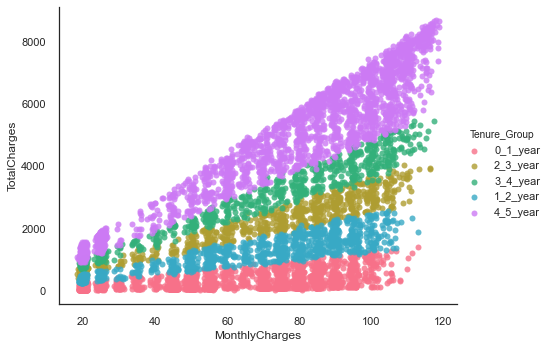

In [195]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=df,fit_reg = False,hue = "Tenure_Group",palette='husl',aspect=12/9);

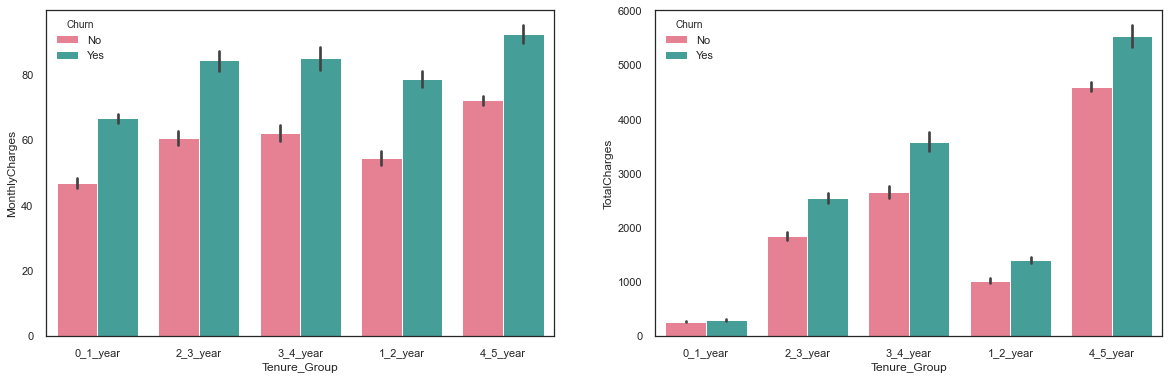

In [196]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=df,palette='husl',hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=df,palette='husl',hue = "Churn",ax = axes[1]);

In [198]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="Telecom_Churn.html")

## Feature Engineering

#### Convert Categorical Values to Numeric

In [199]:
for col in df.dtypes[df.dtypes == object].index:
    print(col, df[col].unique()) 
# To identify the unique value types in categorical data columns 

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']
Tenure_Group ['0_1_year' '2_3_year' '3_4_year' '1_2_year' '4_5_year']


In [200]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
Tenure_Group           5
dtype: int64

In [201]:
#CustomerIDs are all unique and will not have any affect in customer churn
df.drop("customerID", axis= 1, inplace= True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Tenure_Group        7043 non-null object
dtypes: float64(2), int64(2), ob

In [203]:
##Integer encoding churn for binary classification -- The Label we will be predicting for
df["Churn"]= df["Churn"].apply(lambda x: 0 if x=='No' else 1)

In [204]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0_1_year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2_3_year
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0_1_year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3_4_year
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0_1_year


In [205]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### Normalization of numeric datatypes

In [206]:
df["MonthlyCharges"] = df["MonthlyCharges"]/(df["MonthlyCharges"].max(axis = 0)) 

In [207]:
df["TotalCharges"] = df["TotalCharges"]/(df["TotalCharges"].max(axis = 0)) 

In [208]:
df["tenure"] = df["tenure"]/(df["tenure"].max(axis = 0)) 

In [209]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.251368,0.003437,0,0_1_year
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.479579,0.217564,0,2_3_year
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.453474,0.012453,1,0_1_year
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.356211,0.211951,0,3_4_year
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.595368,0.017462,1,0_1_year


In [210]:
#Label encode ordinal categorical data columns
label_encoder = preprocessing.LabelEncoder()
df['Tenure_Group']= label_encoder.fit_transform(df['Tenure_Group']) 
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.251368,0.003437,0,0
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.479579,0.217564,0,2
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.453474,0.012453,1,0
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.356211,0.211951,0,3
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.595368,0.017462,1,0
5,Female,0,No,No,0.111111,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.839158,0.094475,1,0
6,Male,0,No,Yes,0.305556,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.750316,0.224461,0,1
7,Female,0,No,No,0.138889,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,0.250526,0.034762,0,0
8,Female,0,Yes,No,0.388889,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.882526,0.350733,1,2
9,Male,0,No,Yes,0.861111,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),0.472842,0.401615,0,4


In [211]:
#One Hot Encode the nominal categorical data columns
df_ohe = pd.get_dummies(df)

In [212]:
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.251368,0.003437,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0.472222,0.479579,0.217564,0,2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,0.027778,0.453474,0.012453,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,0.625000,0.356211,0.211951,0,3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0.027778,0.595368,0.017462,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.714105,0.229194,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,1.000000,0.869053,0.847792,0,4,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,0.152778,0.249263,0.039892,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,0.055556,0.626526,0.035303,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [213]:
df_ohe.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Tenure_Group                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [214]:
df_ohe.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.0
tenure,7043.0,0.449599,0.341104,0.000000,0.125000,0.402778,0.763889,1.0
MonthlyCharges,7043.0,0.545362,0.253390,0.153684,0.298947,0.592421,0.756632,1.0
TotalCharges,7043.0,0.262497,0.261007,0.000000,0.045891,0.160574,0.436003,1.0
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.0
Tenure_Group,7043.0,1.977850,1.663316,0.000000,0.000000,2.000000,4.000000,4.0
gender_Female,7043.0,0.495244,0.500013,0.000000,0.000000,0.000000,1.000000,1.0
gender_Male,7043.0,0.504756,0.500013,0.000000,0.000000,1.000000,1.000000,1.0
Partner_No,7043.0,0.516967,0.499748,0.000000,0.000000,1.000000,1.000000,1.0
Partner_Yes,7043.0,0.483033,0.499748,0.000000,0.000000,0.000000,1.000000,1.0


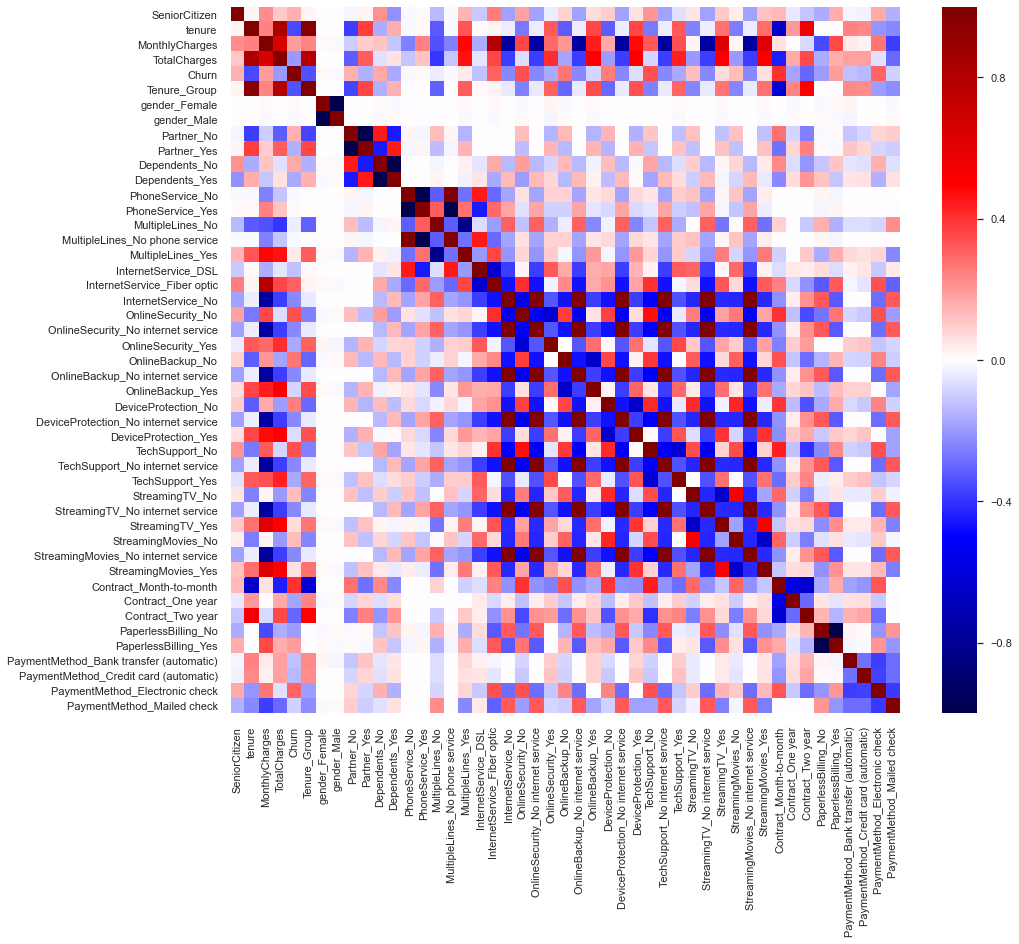

In [218]:
# Correlation Matrix
sns.set(rc={'figure.figsize':(15,13)})
sns.heatmap(df_ohe.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);


#other ideas - Have a single column for tenure group - label encode 12345
#gender
#try 01 or 0123

In [219]:
df_ohe.corr()['Churn'].sort_values()

tenure                                    -0.352229
Tenure_Group                              -0.339441
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
StreamingMovies_No internet service       -0.227890
OnlineBackup_No internet service          -0.227890
OnlineSecurity_No internet service        -0.227890
TotalCharges                              -0.198324
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMetho

In [220]:
df_ohe.corr(method="pearson")

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,0.019987,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,-0.008576,0.008576,-0.136213,-0.008576,0.142948,-0.108322,0.255338,-0.182742,0.185532,-0.182742,-0.038653,0.087952,-0.182742,0.066572,0.094810,-0.182742,0.059428,0.205620,-0.182742,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,0.974567,-0.005106,0.005106,-0.379697,0.379697,-0.159712,0.159712,-0.008448,0.008448,-0.323088,-0.008448,0.331941,0.013274,0.019720,-0.039062,-0.263746,-0.039062,0.327203,-0.312694,-0.039062,0.360277,-0.312740,-0.039062,0.360653,-0.262143,-0.039062,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,0.237413,0.014569,-0.014569,-0.096848,0.096848,0.113890,-0.113890,-0.247398,0.247398,-0.338314,-0.247398,0.490434,-0.160189,0.787066,-0.763557,0.360898,-0.763557,0.296594,0.210753,-0.763557,0.441780,0.171836,-0.763557,0.482692,0.322076,-0.763557,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,0.796022,0.000080,-0.000080,-0.317504,0.317504,-0.062078,0.062078,-0.113214,0.113214,-0.396059,-0.113214,0.468504,-0.052469,0.361655,-0.375223,-0.063137,-0.375223,0.411651,-0.176276,-0.375223,0.509226,-0.188108,-0.375223,0.521983,-0.082874,-0.375223,0.431883,-0.195884,-0.375223,0.514973,-0.202188,-0.375223,0.520122,-0.444255,0.170814,0.354481,-0.158574,0.158574,0.185987,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,-0.339441,0.008612,-0.008612,0.150448,-0.150448,0.164221,-0.164221,-0.011942,0.011942,-0.032569,-0.011942,0.040102,-0.124214,0.308020,-0.227890,0.342637,-0.227890,-0.171226,0.268005,-0.227890,-0.082255,0.252481,-0.227890,-0.066160,0.337281,-0.227890,-0.164674,0.128916,-0.227890,0.063228,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
Tenure_Group,0.019987,0.974567,0.237413,0.796022,-0.339441,1.000000,-0.002859,0.002859,-0.360353,0.360353,-0.151277,0.151277,-0.004299,0.004299,-0.308039,-0.004299,0.314231,0.010717,0.022459,-0.039413,-0.243736,-0.039413,0.305398,-0.298431,-0.039413,0.345692,-0.294547,-0.039413,0.341947,-0.242995,-0.039413,0.303446,-0.234435,-0.039413,0.269379,-0.239778,-0.039413,0.273923,-0.624496,0.235857,0.502351,-0.005800,0.005800,0.230527,0.221459,-0.194070,-0.225820
gender_Female,0.001874,-0.005106,0.014569,0.000080,0.008612,-0.002859,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,-0.006488,0.006488,-0.004476,-0.006488,0.008414,-0.006568,0.011286,-0.006026,-0.010429,-0.006026,0.017021,-0.008191,-0.006026,0.013773,0.002988,-0.006026,0.00210

In [221]:
# store df_ohe to csv file
df_ohe.to_csv('df_ohe.csv', index=False)

## ML Model

In [139]:
X = df1.drop(['Churn'], axis=1)
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5282, 50), (1761, 50), (5282,), (1761,))

In [117]:
len(X)

7043

In [118]:
len(y)

7043

In [119]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
6661,0,1.000000,0.451789,0.435704,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1
4811,0,0.055556,0.387368,0.022292,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2193,0,0.777778,0.178526,0.142623,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
1904,0,0.777778,0.795368,0.590065,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1
6667,0,0.125000,0.669895,0.083295,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [120]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
5909,0,0.722222,0.675368,0.494842,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3670,0,0.458333,0.204211,0.096548,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
6220,0,0.138889,0.452211,0.059990,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0
5905,0,0.013889,0.715789,0.009787,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0
6435,0,0.722222,0.422737,0.294077,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1


In [121]:
y_train.head()

6661    0
4811    1
2193    0
1904    1
6667    1
Name: Churn, dtype: int64

In [122]:
y_test.tail()

476     0
1607    1
6808    0
2962    1
3955    0
Name: Churn, dtype: int64

### Decision Tree Cassifier

In [145]:
DecisionTreeClassifier?

In [123]:
model = DecisionTreeClassifier(random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1294
           1       0.50      0.50      0.50       467

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761

r2: -0.36672469543172403
MSE: 0.2663259511641113
accuracy score: 0.7336740488358887
confusion matrix:
 [[1058  236]
 [ 233  234]]


In [124]:
model.feature_importances_

array([0.0224959 , 0.11602244, 0.19289425, 0.18631372, 0.01148978,
       0.01628874, 0.01538375, 0.00876044, 0.00879792, 0.00528057,
       0.00124198, 0.        , 0.00845622, 0.00304148, 0.01004825,
       0.        , 0.05164497, 0.00065118, 0.01113308, 0.        ,
       0.00644885, 0.01413817, 0.        , 0.00787617, 0.00445918,
       0.        , 0.00774446, 0.01436745, 0.        , 0.0101852 ,
       0.00361344, 0.        , 0.00462964, 0.00563742, 0.        ,
       0.00247069, 0.16464917, 0.00288161, 0.        , 0.00909502,
       0.00950129, 0.01248356, 0.01384813, 0.0143261 , 0.00951943,
       0.00020429, 0.00352916, 0.00074718, 0.0052092 , 0.00249052])

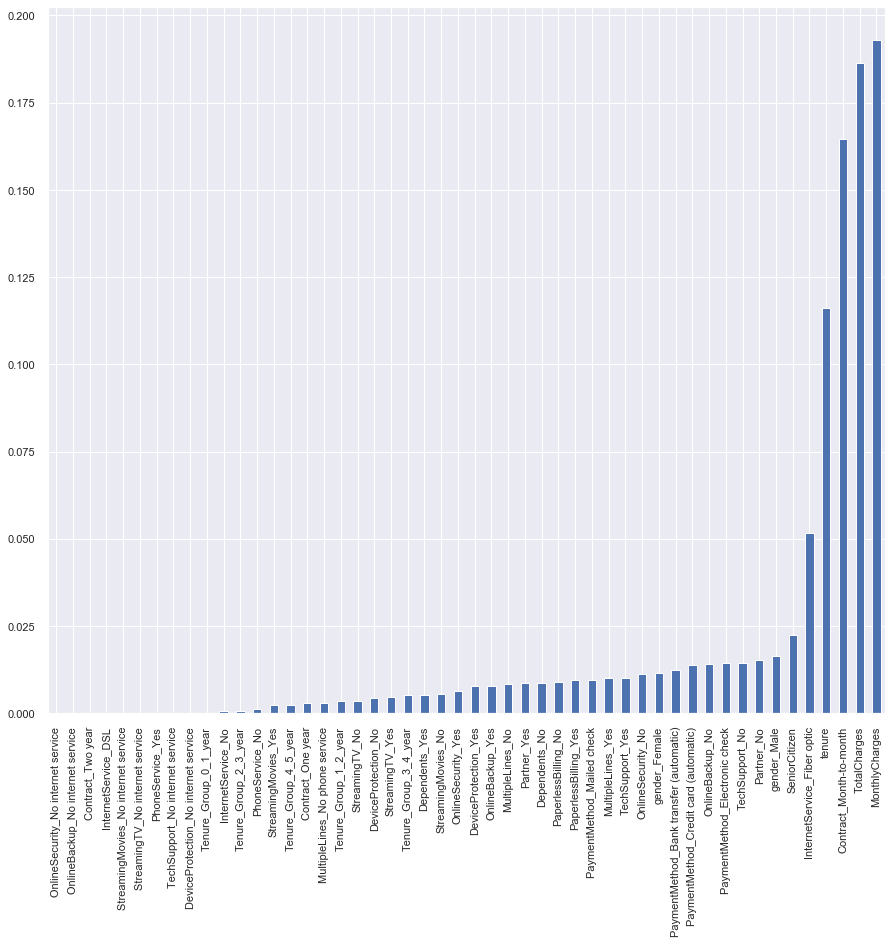

In [64]:
pd.Series(model.feature_importances_, index= X.columns).sort_values().plot(kind = 'bar');

In [148]:
# dropping the features with lower importances? 
#penalty l2
#class weight
#C
#max_iter

### Logistic Regression

In [147]:
LogisticRegression?

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.66      0.52      0.58       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761

r2: -0.014115552260639541
MSE: 0.19761499148211242
accuracy score: 0.8023850085178875
recall score: 0.5182012847965739
confusion matrix:
 [[1171  123]
 [ 225  242]]
Area under ROC curve :  0.7115735944848401 



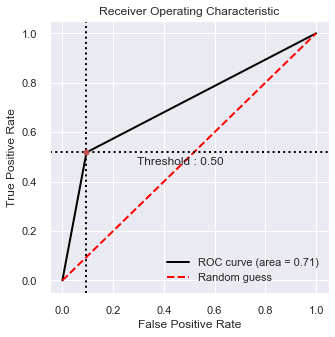

In [169]:
model = LogisticRegression (n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test,y_pred))
    

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [126]:
print(model.coef_)

[[ 2.04499249e-01 -2.85852019e+00 -3.19748060e-01 -1.06269344e-02
  -3.58648825e-02 -2.81410896e-02 -3.31960009e-02 -3.08099712e-02
   7.00490348e-02 -1.34055007e-01  1.99589091e-02 -8.39648812e-02
  -2.22870543e-01  1.99589091e-02  1.38905662e-01 -4.38442622e-01
   5.21550155e-01 -1.47113505e-01  2.33586041e-01 -1.47113505e-01
  -1.50478508e-01  1.18658476e-01 -1.47113505e-01 -3.55509427e-02
   3.35650064e-02 -1.47113505e-01  4.95425268e-02  1.99956440e-01
  -1.47113505e-01 -1.16848907e-01 -1.01681888e-01 -1.47113505e-01
   1.84789421e-01 -1.32069835e-01 -1.47113505e-01  2.15177368e-01
   7.07492009e-01 -3.83067149e-02 -7.33191266e-01 -2.38227894e-01
   1.74221922e-01 -1.26602554e-01 -1.32313714e-01  2.20385055e-01
  -2.54747600e-02  1.74850455e-03 -4.27107841e-01 -4.02566795e-01
   2.32681067e-01  5.31239092e-01]]


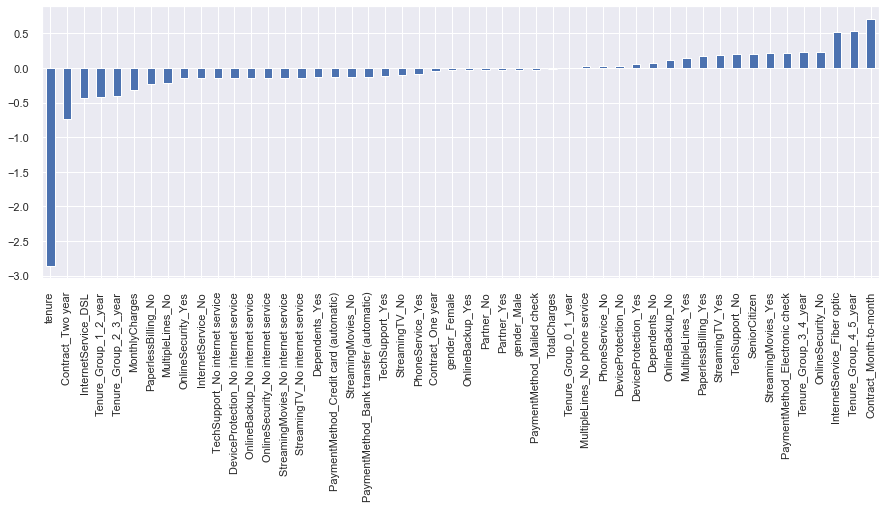

In [127]:
pd.Series(model.coef_[0], index = X.columns).sort_values().plot(kind='bar',figsize=(15,5));

### Random Forest

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1294
           1       0.61      0.46      0.52       467

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.78      0.77      1761

r2: -0.1394229337181323
MSE: 0.2220329358319137
accuracy score: 0.7779670641680864
confusion matrix:
 [[1154  140]
 [ 251  216]]
best_max_depth:


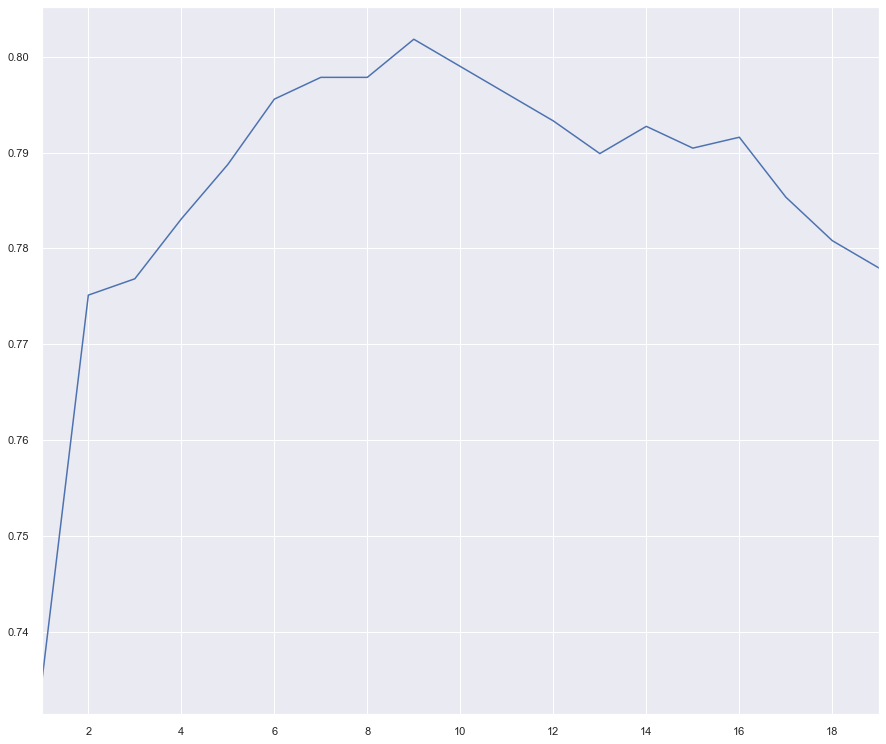

In [152]:
scores = []
for i in range(1,20):
    model = RandomForestClassifier(max_depth= i, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))
print('best_max_depth:') 
pd.Series(scores,index = range(1,20)).plot();

In [91]:
model = RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test,y_pred))
    
print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.67      0.50      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761

r2: -0.017029677410813848
MSE: 0.19818285065303803
accuracy score: 0.8018171493469619
confusion matrix:
 [[1178  116]
 [ 233  234]]


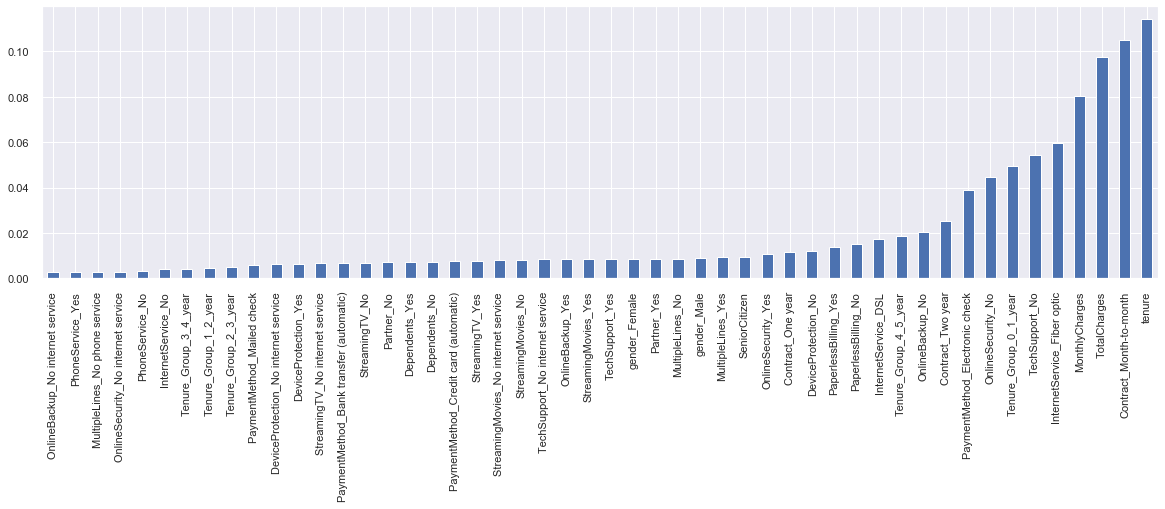

In [92]:
pd.Series(model.feature_importances_, index = X.columns).sort_values().plot(kind='bar',figsize=(20,5));

##### Hyperparameter Tuning 

In [99]:
from imblearn.pipeline import make_pipeline

pipe = Pipeline([ 
    ('scaler', MinMaxScaler()),
    ('model', RandomForestClassifier())
])

parameters = {
    'model__n_estimators' : range(0,20),
    'model__max_depth' : range(0,20),
    'model__criterion' : ['gini', 'entropy'],
}

gs = GridSearchCV(pipe, parameters, scoring = 'recall', cv = 5, n_jobs = 1, verbose = 10)
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.2s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=1, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estima

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=5 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=5, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=5 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=5, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estima

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=7, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=7 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=7, score=nan, total=   0.1s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=7 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=7, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estima

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=10, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=10, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=10, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=10, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=10, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, mode

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=13, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=13, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=13, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=13, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, mode

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=16, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=16 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=16, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=16 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=16, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=16 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=16, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, mode

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, mode

[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=10, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=10, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=10, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=10, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=11, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=11, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=1, score=0.527, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=1, score=0.580, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=1, score=0.525, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=1, score=0.432, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=2, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, mod

[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=11, score=0.236, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=11, score=0.193, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=12, score=0.256, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=12, score=0.345, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=12, score=0.400, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=12, score=0.243, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=1, score=0.518, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=1, score=0.486, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=2, score=0.295, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=2, score=0.399, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=2, score=0.311, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=2, score=0.382, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, mod

[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=12, score=0.350, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=12, score=0.311, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=12, score=0.339, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=13, score=0.352, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=13, score=0.324, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=13, score=0.343, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=1, score=0.285, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_esti

[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=10, score=0.382, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=10, score=0.332, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=10, score=0.425, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=11, score=0.342, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=11, score=0.452, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=11, score=0.421, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=1, score=0.432, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.470, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.559, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.418, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.414, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.543, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, mod

[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=12, score=0.336, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=12, score=0.461, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=13, score=0.370, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=13, score=0.456, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=13, score=0.482, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=13, score=0.421, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.530, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.527, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.475, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.511, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.450, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=3, score=0.388, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, mod

[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.420, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.475, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.468, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.546, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=13, score=0.452, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=3, score=0.537, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=3, score=0.523, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=3, score=0.496, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=3, score=0.511, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=3, score=0.536, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=4, score=0.431, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, mod

[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=13, score=0.495, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=13, score=0.516, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=13, score=0.482, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=13, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=13, score=0.554, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=14, score=0.427, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=1, score=0.361, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=1, score=0.618, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.470, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.541, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.504, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.454, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, mod

[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=11, score=0.550, total=   0.1s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=12, score=0.470, total=   0.1s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=12, score=0.512, total=   0.1s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=12, score=0.504, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=12, score=0.521, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=12, score=0.561, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=2, score=0.532, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=3, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=3, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=3, score=0.493, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=3, score=0.482, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=3, score=0.561, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, mod

[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=12, score=0.493, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=12, score=0.532, total=   0.1s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=13, score=0.473, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=13, score=0.534, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=13, score=0.496, total=   0.1s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=13, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=2, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=2, score=0.429, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=2, score=0.461, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=2, score=0.550, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=3, score=0.431, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=3, score=0.516, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=12, score=0.464, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=12, score=0.579, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.452, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.580, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.486, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.461, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=2, score=0.477, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=2, score=0.495, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=2, score=0.464, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=2, score=0.461, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=2, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=3, score=0.473, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=12, score=0.463, total=   0.1s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=12, score=0.530, total=   0.1s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=12, score=0.543, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=12, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=12, score=0.579, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=13, score=0.456, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=2, score=0.459, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=2, score=0.431, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=2, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=2, score=0.421, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=2, score=0.475, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=3, score=0.477, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=12, score=0.544, total=   0.1s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=12, score=0.482, total=   0.1s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=12, score=0.479, total=   0.1s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=12, score=0.511, total=   0.1s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=13, score=0.441, total=   0.1s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=13, score=0.555, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=2, score=0.429, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.505, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.530, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.507, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.468, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.518, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=12, score=0.546, total=   0.1s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.463, total=   0.1s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.569, total=   0.1s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.471, total=   0.1s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.471, total=   0.1s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.579, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=1, score=0.470, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=1, score=0.488, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=1, score=0.429, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=1, score=0.489, total=   0.0s
[CV] model__criterion=gini, model__max_depth

[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=10, score=0.461, total=   0.1s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=10, score=0.500, total=   0.1s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=11, score=0.463, total=   0.1s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=11, score=0.541, total=   0.1s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=11, score=0.518, total=   0.1s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=11, score=0.461, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=1, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=1, score=0.512, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=1, score=0.489, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=1, score=0.436, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=1, score=0.575, total=   0.0s
[CV] model__criterion=gini, model__max_dep

[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=10, score=0.543, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=11, score=0.431, total=   0.1s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=11, score=0.559, total=   0.1s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=11, score=0.482, total=   0.1s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=11, score=0.489, total=   0.1s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=11, score=0.543, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=1, score=0.416, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=1, score=0.537, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=1, score=0.511, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=1, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=1, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=2, score=0.367, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=11, score=0.516, total=   0.1s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=11, score=0.500, total=   0.1s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=11, score=0.479, total=   0.1s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=11, score=0.550, total=   0.1s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=12, score=0.445, total=   0.1s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=12, score=0.534, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=1, score=0.448, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, m

[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=9, score=0.500, total=   0.1s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=10, score=0.441, total=   0.1s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=10, score=0.523, total=   0.1s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=10, score=0.496, total=   0.1s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=10, score=0.446, total=   0.1s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=10, score=0.475, total=   0.1s
[CV] model__criterion=gini, mo

[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=19, score=0.489, total=   0.1s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=19, score=0.457, total=   0.1s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=19, score=0.543, total=   0.1s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=0 


C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=1, score=0.466, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=1, score=0.537, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=1, score=0.518, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1

[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=10, score=0.425, total=   0.1s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=10, score=0.468, total=   0.1s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=11, score=0.445, total=   0.1s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=11, score=0.555, total=   0.1s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=11, score=0.536, total=   0.1s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=11, score=0.457, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=2, score=0.300, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=2, score=0.296, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=3, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=3, score=0.491, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=3, score=0.507, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=3, score=0.479, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=12, score=0.446, total=   0.1s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=13, score=0.463, total=   0.1s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=13, score=0.527, total=   0.1s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=13, score=0.479, total=   0.1s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=13, score=0.464, total=   0.1s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=13, score=0.536, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=2, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=3, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=3, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=3, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=3, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=3, score=nan, total=   0.0s
[CV] model__criterion=entropy,

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=5, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=6 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=6, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=6 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=6, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=6 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=6, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=6 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=6, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=6 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=6, score=nan, total=   0.0s
[CV] model__criterion=entropy,

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=9, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=9 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=9, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=9 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=9, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=9 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=9, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=10, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=10, score=nan, total=   0.0s
[CV] model__criterion=entr

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=13, score=nan, total=   0.0s
[CV] model__criteri

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=15 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=15, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=15 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=15, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=15 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=15, score=nan, total=   0.0s
[CV] model__criteri

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=16, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=16 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=16, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criteri

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criteri

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=2, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=2, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=2, score=0.000, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=11, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=11, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=11, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=11, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=12, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=12, score=0.000, total=   0.1s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=2, score=0.391, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=2, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=2, score=0.429, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=2, score=0.454, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=3, score=0.253, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_de

[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=11, score=0.093, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=11, score=0.229, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=12, score=0.121, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=12, score=0.242, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=12, score=0.293, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=entropy, mod

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=1, score=0.593, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=1, score=0.350, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=2, score=0.157, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=2, score=0.502, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=2, score=0.204, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_de

[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=11, score=0.367, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=11, score=0.318, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=11, score=0.318, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=11, score=0.425, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=12, score=0.299, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=12, score=0.466, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=1, score=0.479, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=2, score=0.509, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=2, score=0.480, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=2, score=0.482, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=2, score=0.289, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=2, score=0.336, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=11, score=0.421, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=12, score=0.349, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=12, score=0.406, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=12, score=0.364, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=12, score=0.368, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=12, score=0.386, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=1, score=0.543, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=2, score=0.377, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=2, score=0.520, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=2, score=0.425, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=2, score=0.425, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_de

[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=11, score=0.371, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=11, score=0.482, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=12, score=0.356, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=12, score=0.484, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=12, score=0.389, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=12, score=0.382, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=2, score=0.530, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=2, score=0.454, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=2, score=0.471, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=2, score=0.532, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=3, score=0.388, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=3, score=0.470, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=11, score=0.479, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=11, score=0.507, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=12, score=0.399, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=12, score=0.480, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=12, score=0.443, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=12, score=0.411, total=   0.1s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=2, score=0.454, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=2, score=0.454, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=2, score=0.486, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=3, score=0.488, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=3, score=0.530, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_de

[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=12, score=0.512, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=12, score=0.489, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=12, score=0.471, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=12, score=0.543, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=13, score=0.431, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=13, score=0.523, total=   0.1s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=1, score=0.537, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=1, score=0.523, total=   0.0s
[CV] model__criterion=ent

[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=10, score=0.507, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=10, score=0.486, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=10, score=0.546, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=11, score=0.459, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=11, score=0.509, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=11, score=0.475, total=   0.1s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=1, score=0.374, total=   0.0s
[CV] model__criterion=entrop

[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=10, score=0.459, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=10, score=0.555, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=10, score=0.507, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=10, score=0.493, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=10, score=0.507, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=11, score=0.456, total=   0.1s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=19, score=0.564, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__crite

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=2, score=0.577, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=2, score=0.479, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=2, score=0.471, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=2, score=0.582, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=3, score=0.470, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=3, score=0.498, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=11, score=0.511, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=11, score=0.493, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=11, score=0.543, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=12, score=0.452, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=12, score=0.530, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=12, score=0.493, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=1, score=0.509, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=1, score=0.530, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=1, score=0.454, total=   0.0s
[CV] model__c

[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=10, score=0.544, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=10, score=0.514, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=10, score=0.500, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=10, score=0.564, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=11, score=0.473, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=11, score=0.552, total=   0

[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=19, score=0.493, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=19, score=0.543, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=1, score=0.461, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=1, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=1, score=0.504, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=2, score=0.448, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=2, score=0.463, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=2 
[CV]  model__criterion=entropy, mo

[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=10, score=0.489, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=10, score=0.543, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=11, score=0.459, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=11, score=0.562, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=11, score=0.486, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=11, score=0.471, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=1, score=0.459, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=1, score=0.562, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=1, score=0.489, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=1, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=1, score=0.539, total=   0.0s
[CV] mode

[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=10, score=0.471, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=10, score=0.496, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=11, score=0.448, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=11, score=0.573, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=11, score=0.514, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=11, score=0.489, total=   0

[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=19, score=0.546, total=   0.2s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=0, score=nan, total=   0.1s
[CV] model__crit

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=1, score=0.452, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=1, score=0.555, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=1, score=0.454, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=1, score=0.514, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=1, score=0.504, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=2, score=0.423, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=10, score=0.504, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=11, score=0.452, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=11, score=0.555, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=11, score=0.493, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=11, score=0.439, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=11, score=0.507, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=1, score=0.559, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=1, score=0.468, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=1, score=0.507, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=1, score=0.550, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=2, score=0.388, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=2, score=0.388, total=   0.1s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=10, score=0.443, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=10, score=0.493, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=11, score=0.473, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=11, score=0.562, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=11, score=0.489, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=11, score=0.500, total=   0

[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=19, score=0.561, total=   0.2s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__crit

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=2, score=0.384, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=2, score=0.359, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=2, score=0.382, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=2, score=0.325, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=2, score=0.407, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=3 
[CV]  model__criterion=entropy, mo

[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=11, score=0.493, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=11, score=0.529, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=12, score=0.445, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=12, score=0.527, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=12, score=0.489, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=12, score=0.436, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=1, score=0.527, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=1, score=0.491, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=1, score=0.454, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=1, score=0.521, total=   0.0s
[CV] model_

[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=10, score=0.496, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=10, score=0.461, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=10, score=0.457, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=11, score=0.456, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=11, score=0.541, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=11, score=0.504, total=   0

[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=19, score=0.471, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=19, score=0.511, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=0 


C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=1, score=0.466, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=1, score=0.473, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=1, score=0.546, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=1, score=0.496, total=   0.0s
[CV] model_

[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=10, score=0.505, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=10, score=0.475, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=10, score=0.429, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=10, score=0.471, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=11, score=0.470, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=11, score=0.534, total=   0

[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=19, score=0.486, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=19, score=0.482, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=19, score=0.521, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=0, score=nan, total=   0.0s
[CV] mod

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=2, score=0.327, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=2, score=0.336, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=2, score=0.307, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=2, score=0.311, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=3, score=0.459, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=3 
[CV]  model__criterion=entropy, mo

[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=11, score=0.457, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=11, score=0.479, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=11, score=0.507, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=12, score=0.452, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=12, score=0.512, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=12, score=0.450, total=   0

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:  3.4min finished


{'model__criterion': 'entropy',
 'model__max_depth': 8,
 'model__n_estimators': 3}

In [153]:
model = RandomForestClassifier(max_depth=8, criterion='entropy', n_estimators=3, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test,y_pred))
    
print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1294
           1       0.63      0.51      0.56       467

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761

r2: -0.07239805526412457
MSE: 0.20897217490062464
accuracy score: 0.7910278250993753
confusion matrix:
 [[1157  137]
 [ 231  236]]


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1294
           1       0.63      0.51      0.56       467

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761

r2: -0.07239805526412457
MSE: 0.20897217490062464
accuracy score: 0.7910278250993753
recall score: 0.5053533190578159
confusion matrix:
 [[1157  137]
 [ 231  236]]
Area under ROC curve :  0.6997400289261259 



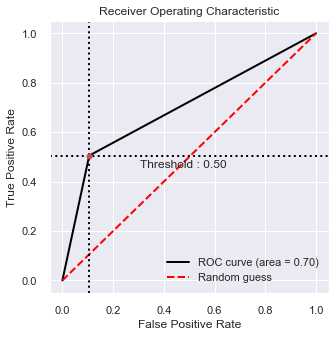

In [171]:
model = RandomForestClassifier(max_depth=8, criterion='entropy', n_estimators=3, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test,y_pred))
    
print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

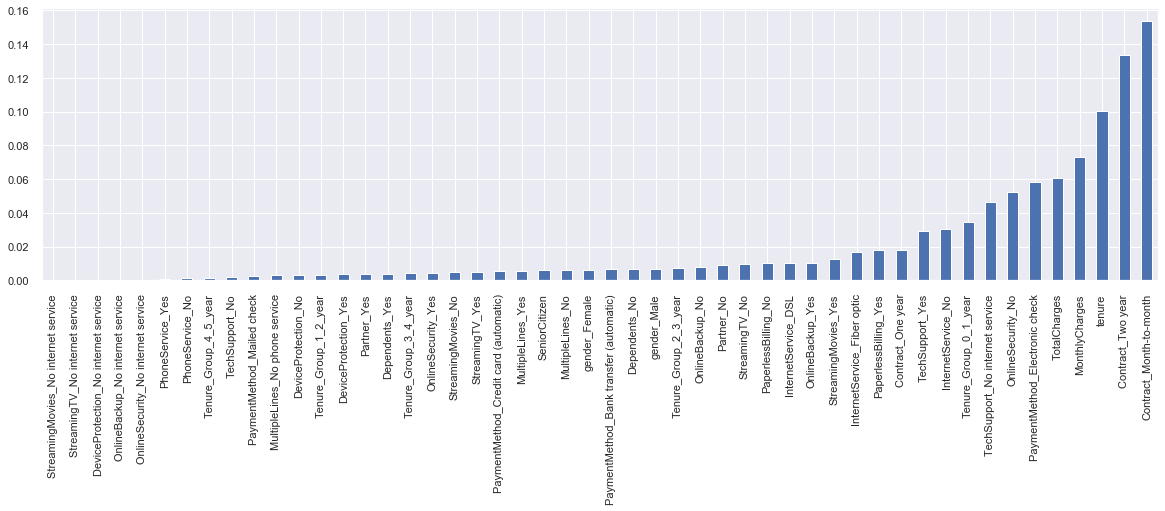

In [172]:
pd.Series(model.feature_importances_, index = X.columns).sort_values().plot(kind='bar',figsize=(20,5));

## XGBoost

In [177]:
import xgboost as xgb

In [178]:
xgb?

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1294
           1       0.62      0.49      0.55       467

    accuracy                           0.79      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.79      0.78      1761

r2: -0.1015393067658672
MSE: 0.21465076660988075
accuracy score: 0.7853492333901193
recall score: 0.49036402569593146
confusion matrix:
 [[1154  140]
 [ 238  229]]
Area under ROC curve :  0.6910861859546118 



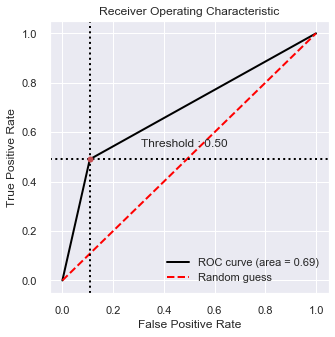

In [179]:
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test,y_pred))
    

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

#### Lets go ahead with Logistic Regression as the score for Random Forest and Logistic Regression is almost similar and LR is much simpler and easier to interpret 

### Selected Algorithm: Logistic Regression

### Oversampling with SMOTE

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1294
           1       0.62      0.59      0.60       467

    accuracy                           0.79      1761
   macro avg       0.74      0.73      0.73      1761
weighted avg       0.79      0.79      0.79      1761

r2: -0.05782742951325326
MSE: 0.2061328790459966
accuracy score: 0.7938671209540034
recall score: 0.5931477516059958
confusion matrix:
 [[1121  173]
 [ 190  277]]
Area under ROC curve :  0.7297268897133534 



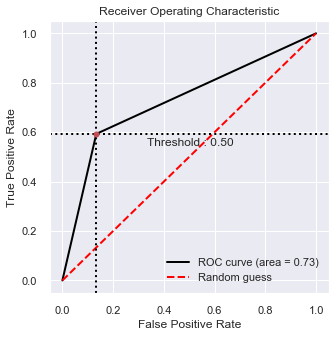

In [167]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = sampler.fit_sample(X_train,y_train)

model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

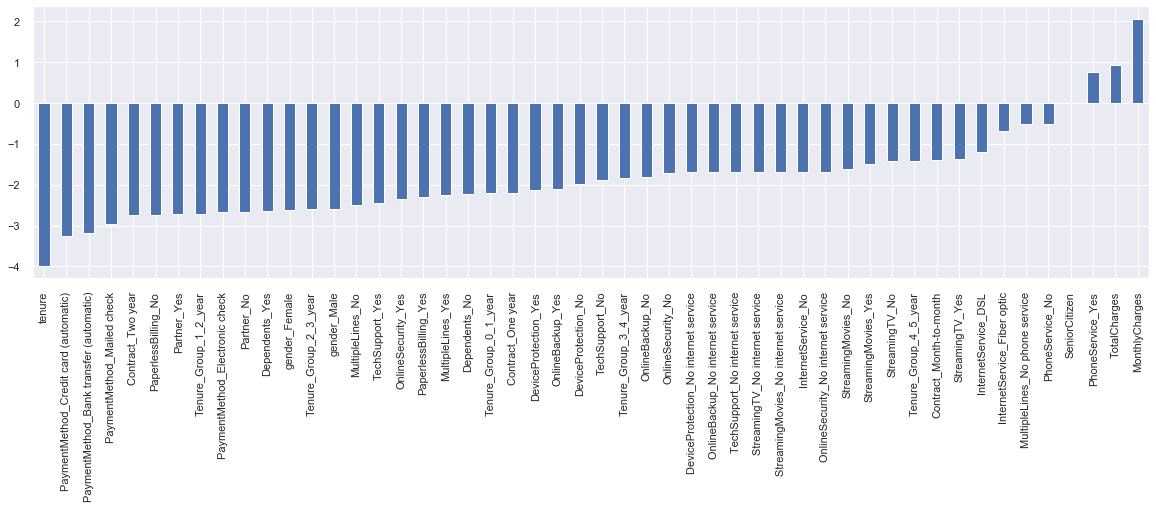

In [163]:
pd.Series(model.coef_[0], index = X.columns).sort_values().plot(kind='bar',figsize=(20,5));

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1294
           1       0.57      0.55      0.56       467

    accuracy                           0.77      1761
   macro avg       0.71      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761

r2: -0.16565006006970062
MSE: 0.2271436683702442
accuracy score: 0.7728563316297559
recall score: 0.550321199143469
confusion matrix:
 [[1104  190]
 [ 210  257]]
Area under ROC curve :  0.7017448345021828 



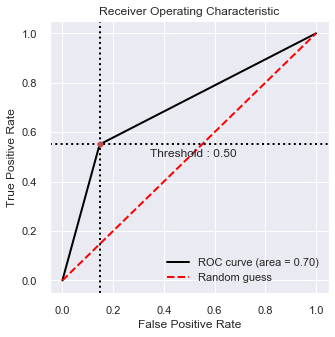

In [180]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = sampler.fit_sample(X_train,y_train)

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Cross Validation using StratifiedKFold

In [164]:
# define how to split into folds
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
acc_scores = []
rec_scores=[]
# pass X into kf.Split(X) to split X as defined by kf
# Loop over each fold, get test and train sets for each fold
for train_index, test_index in kf.split(X_train,y_train):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y[train_index], y[test_index]
    
    # do over sampling because data set is imbalanced
    sampler = SMOTE(random_state=0)
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_tr, y_tr)
    
    # run  model on this fold
    model = LogisticRegression(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    # predict
    y_pred = model.predict(X_ts)
    # evaluate
    acc = accuracy_score(y_ts, y_pred)
    rec = recall_score(y_ts, y_pred)
    acc_scores.append(acc)
    rec_scores.append(rec)
 

In [165]:
acc_scores, rec_scores

([0.793755912961211,
  0.8013245033112583,
  0.7821969696969697,
  0.8096590909090909,
  0.7964015151515151],
 [0.6210526315789474,
  0.5929824561403508,
  0.5488721804511278,
  0.640926640926641,
  0.6515679442508711])

In [166]:
from statistics import mean
mean(acc_scores), mean(rec_scores)

(0.796667598406009, 0.6110803706695876)

# two prediction to make one - Ensemble - Boosting? XG Boost

### Feature engg - drop ones near zero and correlational variables drop one of them

## LIME SHAP - Model Interpretation - gives you info about how features affect? to explain your model

#ROC curve